# Abalone - EDA, Classificaiton

### Importing Abalone Dataset

In [ ]:
pip install ucimlrepo

In [23]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
x = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

# Basic EDA and Preprocessing

In [24]:
import numpy as np
import pandas as pd

In [25]:
x.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [26]:
y.head()

,Rings
0,15
1,7
2,9
3,10
4,7


In [27]:
y= y.add(1.5)

Age = 1.5+Rings

To EDA concet Y into X

In [28]:
x['Age'] = y['Rings']

In [29]:
x.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


We dont have null or empty cells in our x

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole_weight'}>],
       [<Axes: title={'center': 'Shucked_weight'}>,
        <Axes: title={'center': 'Viscera_weight'}>,
        <Axes: title={'center': 'Shell_weight'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

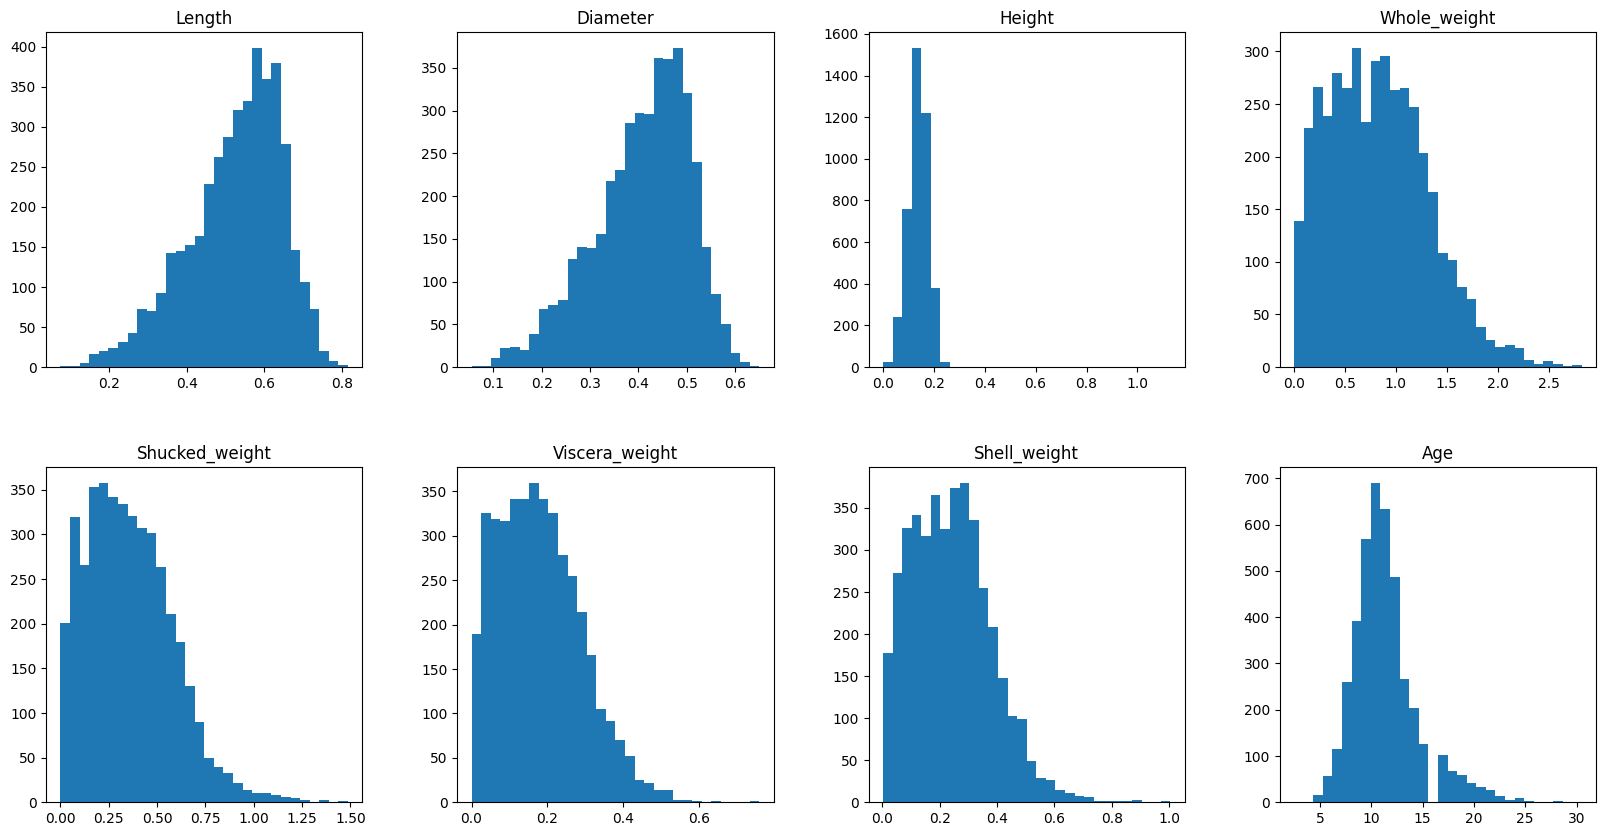

In [31]:
# Histogram visualisation for each attribute to know what kind of distribution it is?
x.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

# Analyzing the correlations with output and each input attribute and find outliers

<Axes: xlabel='Length', ylabel='Age'>

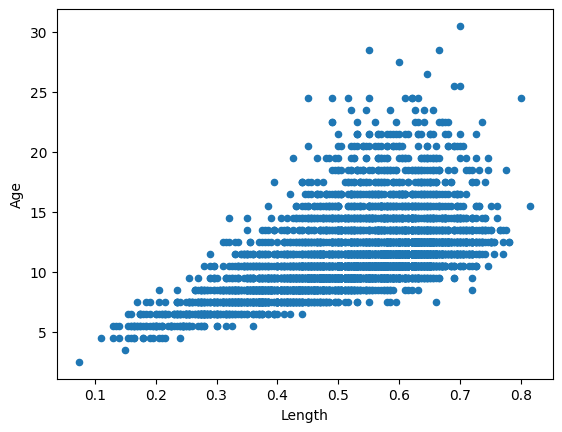

In [32]:
# Histogram visualisation for age output and Longest shell measurement input attributes.

data_plot=pd.concat([x['Age'],x['Length']],axis=1)
data_plot.plot.scatter(x='Length',y='Age')

We dont have any outliers for age and Length

<Axes: xlabel='Diameter', ylabel='Age'>

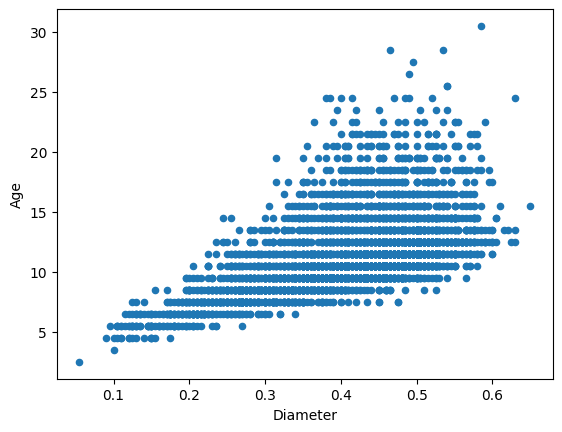

In [33]:
# Histogram visualisation for age output and Diameter input attributes.

data_plot=pd.concat([x['Diameter'],x['Age']],axis=1)
data_plot.plot.scatter(x='Diameter',y='Age')

We Dont have any Outliers for age output and Diameter input

<Axes: xlabel='Height', ylabel='Age'>

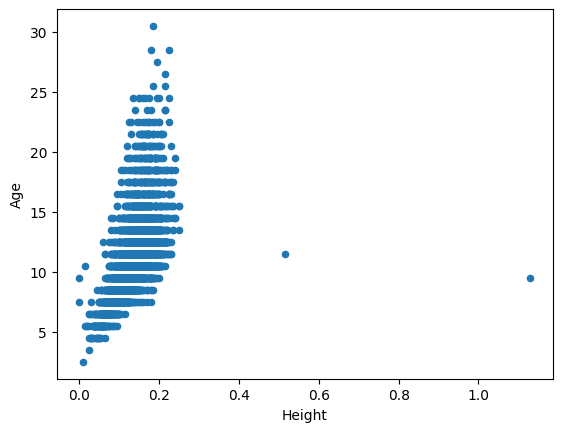

In [34]:
# Histogram visualisation for age output and Height input attributes.

data_plot=pd.concat([x['Height'],x['Age']],axis=1)
data_plot.plot.scatter(x='Height',y='Age')

Between 0.4 to 1.2 values, they are two outliers.

Removing outlier for age and Height

<Axes: xlabel='Height', ylabel='Age'>

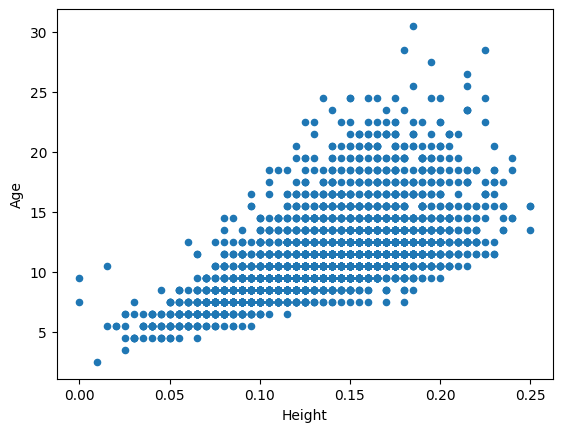

In [35]:
# Removing the outliers values from our x
x=x.drop(x[(x['Height']>0.4) & (x['Height']<1.4)].index)

# Visualising again to know those outlier removed or not
data_plot=pd.concat([x['Height'],x['Age']],axis=1)
data_plot.plot.scatter(x='Height',y='Age')

<Axes: xlabel='Whole_weight', ylabel='Age'>

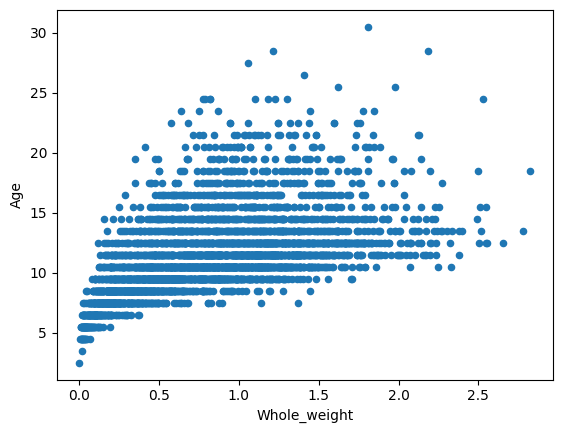

In [36]:
# Histogram visualisation for age output and Whole weight input attributes.

data=pd.concat([x['Whole_weight'],x['Age']],axis=1)
data.plot.scatter(x='Whole_weight',y='Age')

There are no outliers between whole weight and age

<Axes: xlabel='Shucked_weight', ylabel='Age'>

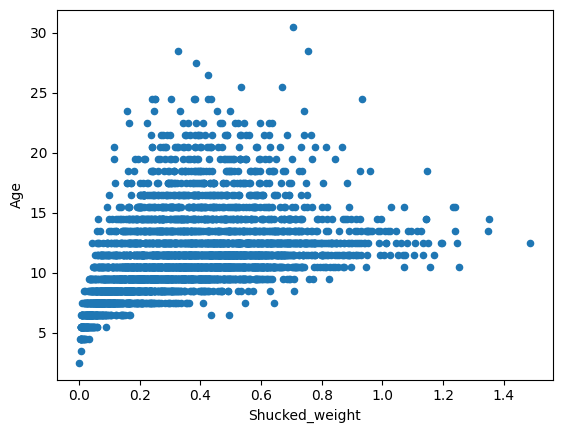

In [37]:
# Histogram visualisation for age output and Shucked weight input attributes.

data=pd.concat([x['Shucked_weight'],x['Age']],axis=1)
data.plot.scatter(x='Shucked_weight',y='Age')

There are no outliers


<Axes: xlabel='Shell_weight', ylabel='Age'>

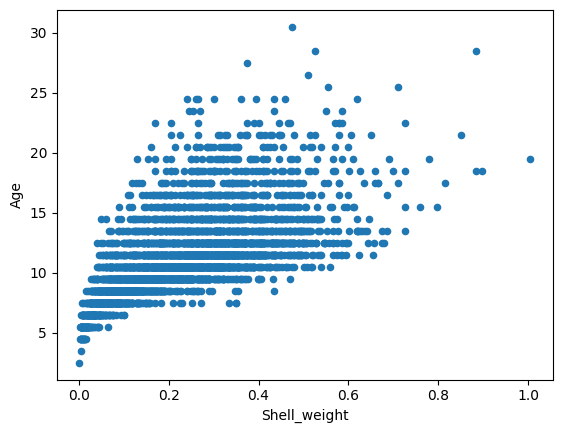

In [38]:
# Histogram Visualisation for Shell weight input attribute and age output attribute.

data=pd.concat([x['Shell_weight'],x['Age']],axis=1)
data.plot.scatter(x='Shell_weight',y='Age')

We are not sure whether those values lies below the threshold 0.9 to 15 values we are going remove those values.

<Axes: xlabel='Shell_weight', ylabel='Age'>

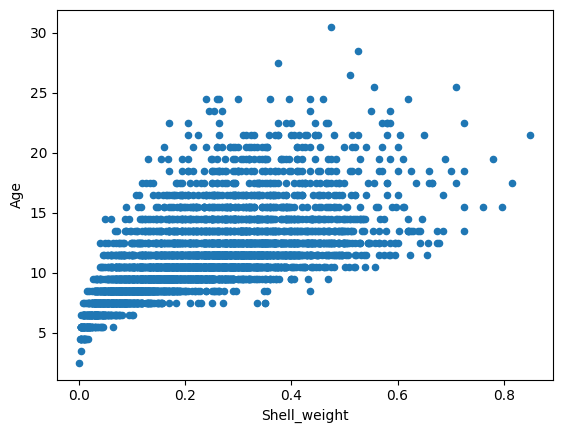

In [39]:
# Removing the outliers for Shell weight input attribute and age output attribute.

x=x.drop(x[(x['Shell_weight']>0.85)&(x['Shell_weight']<15)].index)

# Visualising again to check all outlier below the threshold removed or not.

data=pd.concat([x['Shell_weight'],x['Age']],axis=1)
data.plot.scatter(x='Shell_weight',y='Age')

## Correlation values between each attributes using heatmap

<ipython-input-40-a96d3b1196ad>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_values=x.corr()


<Axes: >

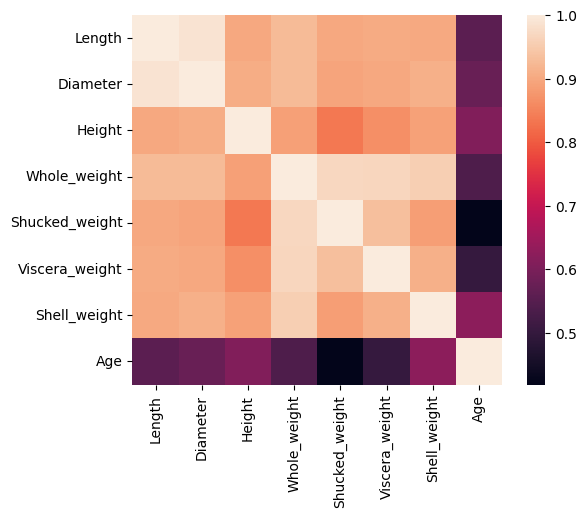

In [40]:
# Correlation value with each attribute using heatmap

import seaborn as sb
correlation_values=x.corr()
sb.heatmap(correlation_values,square=True)

# preprocessing

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [42]:
bins = [0,8,10,y['Rings'].max()]
group_names = ['young','medium','old']
y['Rings'] = pd.cut(y['Rings'],bins, labels = group_names)
dictionary = {'young':0, 'medium':1, 'old':2}
x['age'] = y['Rings'].map(dictionary)

In [43]:
x.drop('Age', axis = 1, inplace = True)
x.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1


### LabelEncoding
Sex: M ,F, I - > 2 , 0 ,1

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Sex'] = le.fit_transform(x['Sex'])

In [45]:
X = x.drop(['age'], axis = 1)
y = x['age']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

### KNN
The k-Nearest-Neighbors method of classification it is essentially classification by finding the most similar data points in the training data, and making an educated guess based on their classifications. This method is used in areas like recommendation systems, semantic searching, and anomaly detection.

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
paramsKn = {'n_neighbors':range(1,40)}
Kneighbours = GridSearchCV(KNeighborsClassifier(),paramsKn, cv=10)

Kneighbours.fit(X=X_train,y=y_train)
Kmodel = Kneighbours.best_estimator_
print(Kneighbours.best_score_, Kneighbours.best_params_)

y_pred = Kmodel.predict(X_test)
knn_accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", knn_accuray)
print("F1 Score:", f1)
print('Classification Report: \n', classification_report(y_test, y_pred))

0.7868731006455558 {'n_neighbors': 29}
Accuracy: 0.8023952095808383
F1 Score: 0.8156604961744769
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.60      0.64        82
           1       0.60      0.44      0.51       180
           2       0.85      0.95      0.90       573

    accuracy                           0.80       835
   macro avg       0.72      0.66      0.68       835
weighted avg       0.79      0.80      0.79       835



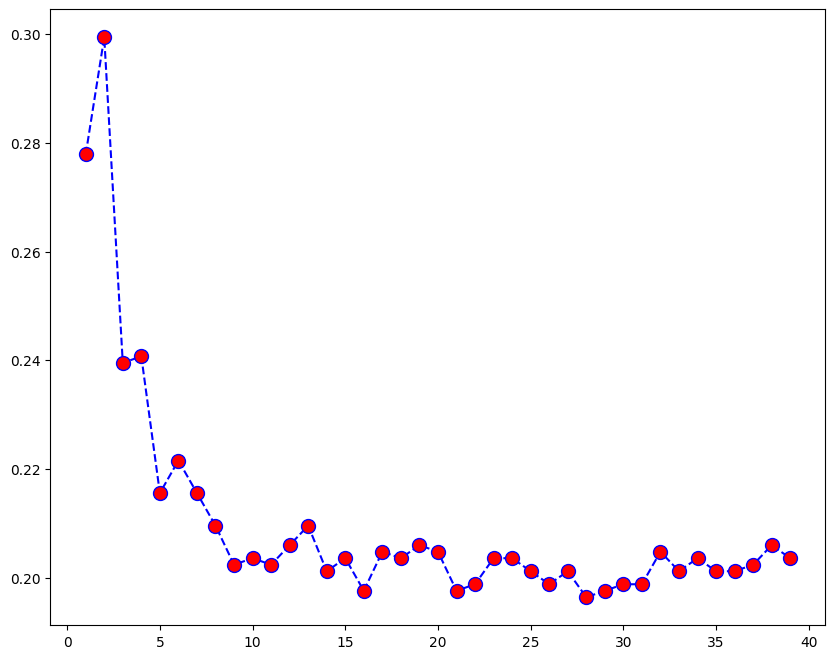

In [48]:
import matplotlib.pyplot as plt
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    y_predi = knn.predict(X_test)
    error_rate.append(np.mean(y_test != y_predi))

plt.figure(figsize = (10,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

### SVM
The Support Vector Machine is a discriminative classifier formally defined by a separating hyperplane. The goal of the model is to output optimal hyperplane that will categorize the data into categories. There are many hyperplanes dividing data possible so the object is to find one that will maximize the distance from the line to the classes.

In [50]:
from sklearn.svm import SVC
paramsSvm = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                  'C':[0.1,1,10],'gamma':[0.01,0.1,0.5,1,2]}

Svm = GridSearchCV(SVC(),paramsSvm,cv=5)

Svm.fit(X_train,y_train)
model_svm = Svm.best_estimator_
print(Svm.best_score_,Svm.best_params_)

y_pred = model_svm.predict(X_test)
svm_accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", svm_accuray)
print("F1 Score:", f1)
print('Classification Report: \n', classification_report(y_test, y_pred))

0.78597258257099 {'C': 1, 'gamma': 2, 'kernel': 'poly'}
Accuracy: 0.7952095808383234
F1 Score: 0.805440493904367
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.65      0.67        82
           1       0.58      0.44      0.50       180
           2       0.86      0.93      0.89       573

    accuracy                           0.80       835
   macro avg       0.71      0.67      0.69       835
weighted avg       0.78      0.80      0.78       835



### Naive Baues Classifier

In [51]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model_NB = GaussianNB()

# Model training
model_NB.fit(X_train, y_train)

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model_NB.predict(X_test)
NB_accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", NB_accuray)
print("F1 Score:", f1)
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy: 0.7005988023952096
F1 Score: 0.6824100781526722
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.85      0.64        82
           1       0.40      0.54      0.46       180
           2       0.91      0.73      0.81       573

    accuracy                           0.70       835
   macro avg       0.61      0.71      0.64       835
weighted avg       0.76      0.70      0.72       835



In [54]:
cnn_accuracy = 0.5715

import plotly.graph_objs as go
import plotly.offline as py
x = ['SVC', 'KNN', 'Naive Bayes', 'CNN']
y1 = [svm_accuray, knn_accuray, NB_accuray, cnn_accuracy]

trace1 = go.Bar(x = x, y = y1, name = 'Training Accuracy', marker = dict(color = 'cyan'))

data = [trace1]
layout = go.Layout(title = 'Accuracy Plot', width = 750)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

# KNN :

Accuracy: 0.8023952095808383
F1 Score: 0.8156604961744769

#SVM

Accuracy: 0.7952095808383234
F1 Score: 0.805440493904367


#Naive Bayes

Accuracy: 0.7005988023952096
F1 Score: 0.6824100781526722

#CNN

 loss: 0.9332 - accuracy: 0.5715

KNN is the best classifier